In [1]:
from collections import *
import os
from pprint import pprint
import random
import sys
import time
from typing import *
sys.path.append(os.path.join(os.getcwd(), 'algorithms'))

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Asymptotic Analysis

If $f$, $g$ are functions, then informally
 
- $f = O(g)$ Worst-Case (Upper-bound)
    - if eventually $f$ grows slower than some multiple of g
- $f = \omega(g)$ Best-Case (Lower-bound)
    - if eventually $f$ grows faster than some multiple of g
- $f = \theta(g)$ Tight-bound
    - if eventually $f$ grows at the same rate as g

## Time Complexity

- $O(1)$: Constant-time algorithm runs in a constant time no matter how large the input is. For example, checking whether the first byte of a file is null `(0x00)` is constant time; no matter how large the file is, we only need to inspect the first byte. As another example, programs that ignore their input and compute the answer to a specific problem are also constant-time, even though this problem might take a very long time.
- $O\left( \log n \right)$: Logarithmic-time algorithm runs in time proportional to the logarithm of the input. The most common example is perhaps binary search: given a sorted array (with random access) of nn elements, we can find whether a specific item is in the array or not by using binary search, dividing the search space by half by checking the middle element.
- $O(n)$: Linear-time algorithm runs in time proportional to the input. This can be good or bad: when $n$ is the number of elements in an array of integers, radix sorting allows us to sort it in linear-time, a very good performance, but when $n$ is a positive integer and we want to check whether it's prime, doing trial division over all numbers $2, 3, \ldots, n-1$ is a poor performance.
- $O(n \log n)$: Often encountered in sorting algorithms, a linearithmic-time algorithm runs in time that's not particularly distinguishable from linear-time for "reasonable" input. Many comparison-based sorting algorithms (merge sort, heap sort, etc.) take linearithmic-time, because it has been proven to be the best running time possible for comparison-based sorting algorithms.
- $O(n^2)$: Quadratic-time algorithms take time proportional to the square of the input. Example algorithms that take this time are schoolbook multiplication of two $n$-digit numbers or two polynomials of degree $n$ (faster algorithms exist, such as Karatsuba's algorithm), some slow sorting algorithms (selection sort and insertion sort), and solving the longest common subsequence problem using dynamic programming.
- $O(n^3)$: The most common cubic-time algorithms are perhaps the running times of schoolbook matrix multiplication (again, faster algorithms exist such as Strassen's algorithm), computing determinant using Gaussian elimination (which can be done using matrix multiplication) and finding a triangle in a graph of nn vertices (which can also be done using matrix multiplication). Other than that, a cubic-time algorithm will likely have the structure of a loop through nn values inside another loop of nn values inside a third loop of nn values; the three examples above naturally give rise to this structure, but it's uncommon to see any other.
- $O(a^n)$: For an exponential-time algorithm, increasing the input by one is enough to multiply the algorithm's running time (by $a$). Note that if $a < b$, then $a^n = o(b^n)$ (they are not asymptotically the same). An example of this is to evaluate whether a Boolean formula on nn variables can be satisfied; trying each possibility requires $2^n$ cases to be checked (multiplied by the time it takes to actually evaluate the formula).
- $O(n!)$: A factorial-time algorithm is even slower. Such algorithms often check every permutation of an array, in which there are $n!$ of them.

Poly-time: When function $f$ grows as a function of $n$

- $n, n^2, log(n)$
- Not poly-time: $2^n$

![img](img/bigo.png)

# Array, Stack, Queue

In [2]:
from collections import deque
import heapq
from queue import PriorityQueue

In [3]:
q = deque([3, 11, 4, 6, 9, 5, 2, 6, 13])

q.appendleft(100)
print(q.popleft())
q

100


deque([3, 11, 4, 6, 9, 5, 2, 6, 13])

In [4]:
# map heap
h = []
for num in [3, 11, 4, 6, 9, 5, 2, 6, 13]:
    heapq.heappush(h, -num)

for i in range(5):
    print(-heapq.heappop(h))

13
11
9
6
6


In [5]:
# min heap
h = []
for num in [3, 11, 4, 6, 9, 5, 2, 6, 13]:
    heapq.heappush(h, num)

for i in range(5):
    print(heapq.heappop(h))

2
3
4
5
6


In [6]:
q = PriorityQueue()
for num in [3, 11, 4, 6, 9, 5, 2, 6, 13]:
    q.put(num)
    
for i in range(5):
    print(q.get())

2
3
4
5
6



# Linked List

In [7]:
# %load algorithms/linked_list.py

In [8]:
from algorithms.linked_list import Node, LinkedList

ll = LinkedList()
ll.insert(np.random.randint(0, 100, size=20))
print(ll)
ll.reverse()
print('reversed', ll)

35, 17, 98, 17, 63, 80, 27, 28, 68, 47, 97, 28, 51, 63, 30, 33, 81, 1, 80, 41
reversed 41, 80, 1, 81, 33, 30, 63, 51, 28, 97, 47, 68, 28, 27, 80, 63, 17, 98, 17, 35


## Doubly linked list

In [9]:
# %load algorithms/doubly_linked_list.py

In [10]:
from algorithms.doubly_linked_list import Node, DoublyLinkedList

ll = DoublyLinkedList()
ll.insert(np.random.randint(0, 100, size=20))
print(ll)
ll.reverse()
print('reversed', ll)

9, 53, 77, 44, 16, 12, 28, 36, 78, 44, 60, 83, 81, 11, 23, 16, 74, 69, 53, 84
reversed 84, 53, 69, 74, 16, 23, 11, 81, 83, 60, 44, 78, 36, 28, 12, 16, 44, 77, 53, 9


# Binary Search Tree

In [11]:
# %load algorithms/binary_search_tree.py

In [12]:
from algorithms.binary_search_tree import BinarySearchTree, TreeNode

nums = [3, 5, 1, 1, 4, 6, 8, 5, -4, -2, -8, 6, 8, 5, -4, -2, -8]
tree = BinarySearchTree()
tree.insert(nums)
print(tree)
print('max:', tree.get_max())
print('min:', tree.get_min())

3: (1: (-4: (-8: (None, -8), -2: (-4, -2)), 1), 5: (4, 6: (5: (None, 5), 8: (6, 8))))
max: 8
min: 1


# Binary Tree

In [13]:
# %load algorithms/binary_tree.py

In [14]:
from algorithms.binary_tree import BinaryTree, TreeNode, maxDepth_DFS, invertTree

nums = [3, 5, 1, 1, 4, 6, 8, 5, -4, -2, -8, 6, 8, 5, -4, -2, -8]
tree = BinaryTree()
tree.insert(nums)
d = maxDepth_DFS(tree.root)
print('depth:', d)
print('tree:')
print(tree)
print('inverted tree:')
print(invertTree(tree.root))

depth: 5
tree:
3: (5: (1: (5: (-2, -8), -4), 4: (-2, -8)), 1: (6: (6, 8), 8: (5, -4)))
inverted tree:
3: (1: (8: (-4, 5), 6: (8, 6)), 5: (4: (-8, -2), 1: (-4, 5: (-8, -2))))


# Graph

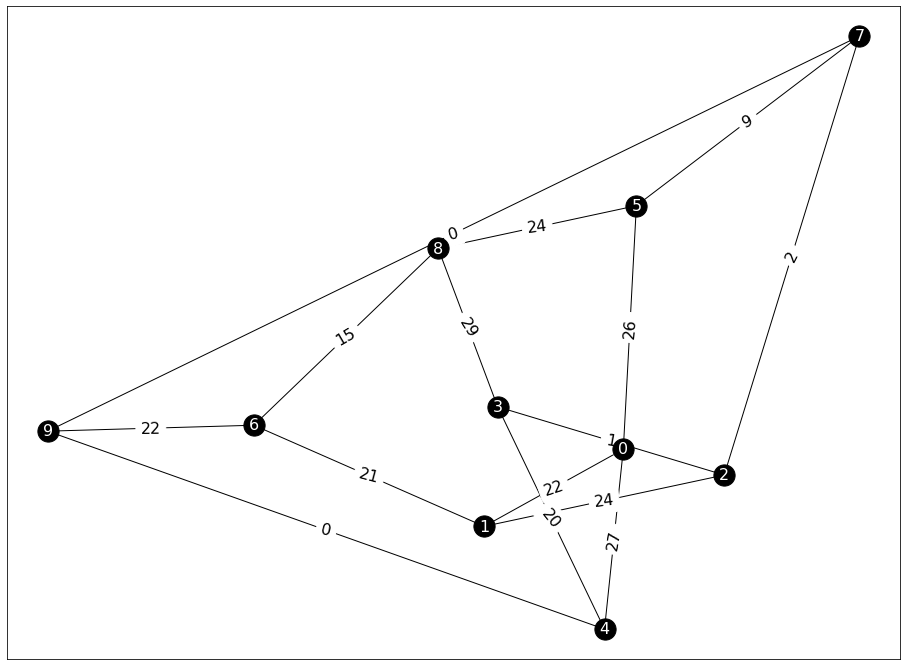

In [130]:
fig, ax = plt.subplots(figsize=(16, 12))

# G = nx.Graph()
# G.add_edge(1, 2, weight=2)
# G.add_edge(1, 3, weight=9)
# nx.draw(G, with_labels=True, ax=ax)

G = nx.petersen_graph()
# G = nx.tutte_graph()
for src, dest in nx.edges(G):
    nx.set_edge_attributes(G, values={(src, dest): random.randint(0, 30)}, name='weight')

pos = nx.spring_layout(G)
# nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, with_labels=True, node_size=450, node_color='#000000')
nx.draw_networkx_labels(G, pos=pos, with_labels=True, font_size=16, font_color='#FFFFFF')

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels, font_size=16)

plt.draw()

## Definitions

Edges can be directed or undirected

An undirected graph is connected if for every pair of nodes u and v, there is a path between u and v.

- A graph is connected if and only if DFS results in a single tree.
- In a connected graph, an edge $e$ is called a “cut edge” if its removal would disconnect the graph

A graph is strongly connected if every pair of nodes is mutually reachable.

A cycle is a path $v_1, v_2, \dots, v_k$ in which $v_1 = v_k, k > 2,$ and the first $k-1$ nodes are all distinct.

An undirected graph is a tree if it is connected and does not contain a cycle.

- Let $G$ be an undirected graph on $n$ nodes. Any two of the following statements imply the third.
    - $G$ is connected.
    - $G$ does not contain a cycle.
    - $G$ has $n-1$ edges.
    
### Traversal

![img](img/dfs.jpg)

- DFS
    - check if path `s -> t` exists
    - usually implemented recursively
- BFS
    - find shortest path
    - implemented with a dequeue and set to keep track of visited nodes
    
![img](img/bfs.jpg)

## Analysis

- BFS
    - more memory than DFS, but guaranteed to find shortest path if the graph is connected
    - BFS runs in $O(m + n)$ or $O(2m)$ time if the graph is given by its adjacency list representation. $\sum_{u\in V}deg(u)$
- DFS
    - less memory than BFS, will not necessarily find shortest path.
    - A graph is connected if and only if DFS results in a single tree.
    - Running time: $O(m + n)$
    - Subset of edges in DFS that “discover a new node” form a forest (a collection of trees)
    - each tree in the DFS result corresponds to a connected component
- Traverse all neighbors of a node u:
    - Adjacency list: $O(\text{number of neighbors}) = O(deg(u))$
    - Adjacency matrix: $O(n)$
- Check if u and v are connected by an edge
    - Adjacency list: $O(\text{number of neighbors}) = O(deg(u)) \text{ or } O(deg(v))$
    - Adjacency matrix: $O(1)$
- Finding "cut edges"
    1. straightforward
        ```
        for edge in G.edges:
            remove edge from G
            check if G is connected (running DFS for example)
            
        ``` 
        - $O(m^2)$ running time
    2. we can do better
        ```
        # run DFS on graph G
        for edge in DFStree:
            remove edge from graph G
            check if G is disconnected (using DFS)
        ```
        - $O(nm)$ running time
- Determine if graph $G$ is strongly connected
    - $O(m + n)$ time
    - algo
        1. pick any node $s$
        2. run BFS from s in $G$
        3. run BFS from s in $G^{rev}$, a graph with reverse orientation of every edge in $G$
        4. return True if and only if all nodes reached in both BFS executions

## Graph Representations


    edges = [(0, 1), (0, 2), (0, 3), (2, 4), (1, 4)]


### Adjacency Matrix

Matrix $A\in n \times n$ where $A_{uv} = 1$ if $(u, v)$ is an edge, otherwise 0.
- two representation of each edge
- diagonally symmetric if undirected graph, assymetrix if directed graph
- space proportional to $n^2$ or $O(|V|^2)$
    - i.e. $|V|=$ number of nodes
- checking if $(u, v) \in A$ takes $\theta(1)$ time
- identifying all edges takes $\theta(n^2)$
- for directed graphs, $A_{ij}$ represent an edge going from node i to j


    [0, 1, 1, 1, 0]
    [1, 0, 0, 0, 1]
    [1, 0, 0, 0, 1]
    [1, 0, 0, 0, 0]
    [0, 1, 1, 0, 0]
    
### Adjacency List

Node indexed array of lists.
- two representation of each edge
- space proportional to $m + n$ or $O(|V|+|E|)$
- checking if $(u, v) \in A$ takes $O(deg(u))$ time, where $deg(u)=$ number of nodes (vertices) connected to $u$
- identifying all edges takes $\theta(m + n)$ time


    0: [1, 2, 3]
    1: [0, 4]
    2: [0, 4]
    3: [0]
    4: [1, 2]

In [15]:
# %load algorithms/graph.py

In [16]:
from algorithms.graph import Graph

edges = [(0, 1), (0, 2), (0, 3), (2, 4), (1, 4)]
directed = False
graph = Graph.from_edges(edges, directed)
print('directed:', directed)
print('adjacency matrix')
for row in graph.adjacency_matrix:
    print(row)

print('\nadjacency list')
adj_list = graph.get_adjacency_list()
for i, row in enumerate(adj_list):
    print(f'{i}: {row}')

directed: False
adjacency matrix
[0, 1, 1, 1, 0]
[1, 0, 0, 0, 1]
[1, 0, 0, 0, 1]
[1, 0, 0, 0, 0]
[0, 1, 1, 0, 0]

adjacency list
0: [1, 2, 3]
1: [0, 4]
2: [0, 4]
3: [0]
4: [1, 2]


In [17]:
directed = True
graph = Graph.from_edges(edges, directed)
print('directed:', directed)
print('adjacency matrix')
for row in graph.adjacency_matrix:
    print(row)

print('\nadjacency list')
adj_list = graph.get_adjacency_list()
for i, row in enumerate(adj_list):
    print(f'{i}: {row}')

directed: True
adjacency matrix
[0, 1, 1, 1, 0]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]

adjacency list
0: [1, 2, 3]
1: [4]
2: [4]
3: []
4: []


## Directed Acyclic Graph (DAG)

- A DAG is a directed graph that contains no directed cycles.
- if $e\in E$ and $e = (u, v)$, then `u -> v` path dependency exists (Precedence constraints)
- if graph $G$ has a topological order, then $G =$ DAG, vice versa
- if graph $G$ is a DAG, then $G$ has one or more nodes that have no incoming edges

### Topological Order

A topological order of a directed graph $G = (V, E)$ is an ordering of its nodes as $v_1, v_2, \dots, v_k$ such that we have $i < j$ $\forall e(v_i, v_j) \in E$
- in other words: for every edge $e$ from $v_i$ to $v_j$, $i$ is less than $j$)
- mental image: all edges pointing from left to right. $v_1$ doesn't have to necessarily be the only source node, multiple nodes can have no incoming edges
- time complexity: $O(m + n)$
- applications
    - course prerequisite graph
    - workflow management (Airflow)


## Misc

### Transitive Closure

The transitive closure graph of $G$ is a graph $G’$:

- with the same vertices as $G$, and
- with an edge between all pairs of nodes that are connected by a path in $G$

### Bipartite Graphs

An undirected graph $G = (V, E)$ is bipartite if the nodes can be colored red or blue such that every edge connects a red node and a blue node

- Applications
    - stable marriage (stable matching?)
    - scheduling: machines = red, jobs = blue
- testing bipartiteness
    - Many graph problems become:
        - easier if the underlying graph is bipartite (matching)
        - tractable if the underlying graph is bipartite (independent set)
    - If a graph $G$ is bipartite, then it cannot contain an odd length cycle.

## Weighted Graph

- [Prim's Algorithm for undirected weighted graph](#Prim's-Algorithm)
- [Dijkstra's Algorithm for un/directed weighted graph](#Dijkstra's-Algorithm)

# Greedy Algorithms

> A greedy algorithm is an algorithm that follows the problem solving heuristic of making the **locally optimal** choice at each stage with the hope of finding a **global optimum**.

Typical problems

- Coin change problem
    - Given a set of coins, $c=\{5, 10, 20, 50\}$, and an amount of change, $x$, find the smellest collection of coins which add up to the change
- Conversion from decimal to binary, vice versa
- Interval Scheduling
- [Dijkstra's Shortest Path](#Dijkstra's-Shortest-Path)
- Clustering

Some other places where a greedy algorithm gets you the best solution:

- Trying to fit as many overlapping meetings as possible in a conference room? At each step, schedule the meeting that *ends* earliest.
- Looking for a minimum spanning tree in a [graph](https://www.interviewcake.com/concept/graph)? At each step, greedily pick the cheapest edge that reaches a new vertex.

**Careful: sometimes a greedy algorithm *doesn't* give you an optimal solution:**

- [When filling a duffel bag with cakes of different weights and values](https://www.interviewcake.com/question/cake-thief), choosing the cake with the highest value per pound doesn't always produce the best haul.
- To find the cheapest route visiting a set of cities, choosing to visit the cheapest city you haven't been to yet doesn't produce the cheapest overall itinerary.

Inversions

An inversion in schedule $S$ is a pair of jobs $(i, k)$ such that $i < k$ (by deadline) but $k$ is scheduled before $i$.

![img](img/inversion.png)

Greedy algorithm doesn't create inversions

## Coin Change

In [18]:
def coinChange(c: List, x: int) -> int:
    cur = c.pop()
    change = 0
    while x > 0:
        if x >= cur:
            print(cur)
            x -= cur
            change += 1
        else:
            cur = c.pop()
            
    return change

c = [1, 5, 10, 25, 50]
x = 95
coinChange(c, x)

50
25
10
10


4

1. Choose the largest coin less than the amount $x$
2. Subtract the value of coin from $x$
3. Repeat until amount = 0

- may not work depending on the set $c$
- Will always work if each coin is an integer multiple of the next smallest denomination e.g. $c=\{40, 20, 10, 1\}$
    - Proof: Can always replace multiple lower denominations (e.g. 2x20c) with fewer higher denominations (1x40c), so the lower denominations will only add up to at most one less than a higher denomination (e.g. there is at most 1x20c, 1x10c, and 9x1c)

## Interval Scheduling

In [19]:
# https://leetcode.com/problems/non-overlapping-intervals/discuss/276056/Python-Greedy-Interval-Scheduling

"""
Given a collection of intervals, find the minimum number of intervals 
you need to remove to make the rest of the intervals non-overlapping.
"""

def eraseOverlapIntervals(intervals):
	end, cnt = float('-inf'), 0
	for i in sorted(intervals, key=lambda x: x[1]):
		if i[0] >= end: 
			end = i[1]
		else: 
			cnt += 1
	return cnt

assert eraseOverlapIntervals([[1,2],[1,2],[1,2]]) == 2

The heuristic is: always pick the interval with the earliest end time. Then you can get the maximal number of non-overlapping intervals. (or minimal number to remove).
This is because, the interval with the earliest end time produces the maximal capacity to hold rest intervals.

E.g. Suppose current earliest end time of the rest intervals is `x`. Then available time slot left for other intervals is `[x:]`. If we choose another interval with end time `y`, then available time slot would be `[y:]`. Since `x ≤ y`, there is no way `[y:]` can hold more intervals then `[x:]`. Thus, the heuristic holds.

Therefore, we can sort interval by ending time and key track of current earliest end time. Once next interval's start time is earlier than current end time, then we have to remove one interval. Otherwise, we update earliest end time.

- Time complexity is $O(nlog(n))$ as sort overwhelms greedy search.

## Minimum Spanning Tree

Given a connected graph $G = (V, E)$ with real-valued edge weights $c_e$ , a MST is a subset of the edges $T\subseteq E$ such that $T$ is a spanning tree whose sum of edge weights is minimized.

![img](img/mst.png)

![img](img/mst2.png)

Cayley's Theorem. There are $n^{n-2}$ spanning trees of $K_n$. Therefore this cannot be solved by brute force.

Greedy Algorithms to find MST

- Reverse-Delete algorithm
    - Start with $T = E$. Consider edges in descending order of cost. Delete edge $e$ from $T$ unless doing so would disconnect $T$.
- Prim's algorithm
    - Start with some root node $s$ and greedily grow a tree $T$ from $s$ outward. At each step, add the cheapest edge $e$ to $T$ that has exactly one endpoint in $T$
    - Time Complexity: $O(|V|^2)$ assuming adjacency matrix
- Kruskal's Algorithm
    – Start with $T = \emptyset$. Consider edges in ascending order of cost. Insert edge $e$ in $T$ unless doing so would create a cycle.

Reference
- https://peades.com/sketchbook/mst/mst.html
- https://www.programiz.com/dsa/prim-algorithm
- https://www.programiz.com/dsa/kruskal-algorithm

Related
- [Graph](#Graph)
- [Prim's Algorithm](#Prim's-Algorithm)

# Divide and Conquer

- Break up problem into several parts.
- Solve each part recursively.
- Combine solutions to sub-problems into overall solution.

Steps

- Break up problem of size $n$ into two equal parts of size $\frac{n}{2}$.
- Solve two parts recursively.
- Combine two solutions into overall solution in linear time.

Use case
- Sorting
- Binary Search
- BST
- Closest pair of points - Given $n$ points in the plane, find a pair with smallest Euclidean distance between them
- Karatsuba Multiplication

Runtime: $O(n \log n)$

Time: $T(\frac{n}{2})+O(1)$

## Master Theorem

The master theorem provides a solution to recurrence relations of the form

$$T(n)=a T\left(\frac{n}{b}\right)+f(n)$$

for constants $a \ge 1$ and $b > 1$ with $f$ asymptotically positive, the following statements are true:

- Case 1. If $f(n)=O\left(n^{\log _{b} a-\epsilon}\right)$ for some $\epsilon>0,$ then $T(n)=\Theta\left(n^{\log _{b} a}\right)$
- Case 2. If $f(n)=\Theta\left(n^{\log _{b} a}\right),$ then $T(n)=\Theta\left(n^{\log _{b} a} \log n\right)$
- Case $\left.3 \text { . If } f(n)=\Omega\left(n^{\log _{b} a+\epsilon}\right) \text { for some } \epsilon>0 \text { (and } a f\left(\frac{n}{b}\right) \leq c f(n) \text { for some } c<1 \text { for all } n \text { sufficiently large }\right)$, then $T(n)=\Theta(f(n))$


For instance, one can show that runtime of the merge sort algorithm satisfies

$$T(n)=2T\left(\frac{n}{2}\right)+n$$

Similarly, traversing a binary tree takes time

$$T(n)=2T\left(\frac{n}{2}\right)+O(1)$$

By comparing $\log_b{a}$ to the asymptotic behavior of $f(n)$, the master theorem provides a solution to many frequently seen recurrences.


Simply put, if $f(n)$ is polynomially smaller than $n^{\log_b{a}}$, then $n^{\log_b{a}}$ dominates, and the runtime is $\Theta\left(n^{\log_b{a}}\right)$. If $f(n)$ is instead polynomially larger than $n^{\log_b{a}}$, then $f(n)$ dominates, and the runtime is $\Theta\big(f(n)\big)$. Finally, if $f(n)$ and $n^{\log_b{a}}$ are asymptotically the same, then $T(n) = \Theta\left(n^{\log_b{a}} \log{n} \right)$.

Invalid (incorrect) use of Master Theorem
![img](img/master.png)

Reference

- https://brilliant.org/wiki/master-theorem/


## Sort

- Merge sort
    - steps
        1. Divide array into two halves
        2. Recursively sort each half
        3. Merge two halves to make sorted whole
    - $T(n) = O(n \log_{2}n)$

## Find closest pair of points

Given a list of $n$ points of form $(i, j)$ in a 2D plane, find a pair with smallest Euclidean distance between them.

Algorithm
1. Divide: Divide the plane in roughly half
2. Conquer: Find closest pair in each sides recursively
3. Combine: Find closest pair with one point in each side
    - Only need to consider points located less than $min(d_L, d_R)$ distance from the border drawn in #1, where $d_L,d_R$ are the distances between the closest pair of points in each side.
4. Return best of 3 solutions

Analysis

$$T(n) \le 2T(\frac{n}{2})+O(n \log n) \rightarrow T(n) = O(n \log^{2}n)$$



## Karatsuba Multiplication

In [20]:
def karat(x,y):
    if len(str(x)) == 1 or len(str(y)) == 1:
        return x*y
    else:
        m = max(len(str(x)),len(str(y)))
        m2 = m // 2

        a = x // 10**(m2)
        b = x % 10**(m2)
        c = y // 10**(m2)
        d = y % 10**(m2)

        z0 = karat(b,d)
        z1 = karat((a+b),(c+d))
        z2 = karat(a,c)

        return (z2 * 10**(2*m2)) + ((z1 - z2 - z0) * 10**(m2)) + (z0)

# Dynamic Programming

Dynamic programming refers to a problem-solving approach, in which we precompute and store simpler, similar subproblems, in order to build up the solution to a complex problem. 
It is similar to recursion, in which calculating the base cases allows us to inductively determine the final value. 
This bottom-up approach works well when the new value depends only on previously calculated values.

An important property of a problem that is being solved through dynamic programming is that it should have overlapping subproblems. 
This is what distinguishes DP from divide and conquer in which storing the simpler values isn't necessary.

Dynamic Programming Prerequisites/Restrictions
- Optimal substructure — optimal solution can be constructed from optimal solutions of its subproblems
- Overlapping sub-problems — problem can be broken down into subproblems which are reused several times or a recursive algorithm for the problem solves the same subproblem over and over rather than always generating new subproblems

Dynamic Programming Problems

- Egg Dropping: What is the best way to drop nn eggs from an m-floored building to figure out the lowest height from which the eggs when dropped crack?
- Subset Sum Problem: Given a set and a value n, is there a subset the sum of whose elements is n?
- [Fibonacci Numbers](#n-th-Fibonacci): Is there a better way to compute Fibonacci numbers than plain recursion?
- [Maximum Subarray](#Maximum-Subarray)
- [Coin Change](#Coin-Change)
- [Knapsack Problem](#Knapsack-Problem): Given a set of treasures with known values and weights, which of them should you pick to maximize your profit whilst not damaging your backpack which has a fixed capacity?
- [Longest Increasing Subsequence](#Longest-Increasing-Subsequence-(LIS))
- [Longest Common Subsequence](#Longest-Common-Subsequence-(LCS)): Given two sequences, which is the longest subsequence common to both of them?

Approaches

- Memoization (top-down cache filling) refers to the technique of caching and reusing previously computed results. The memoized fib function would thus look like this:
    ```
    memFib(n) {
        if (mem[n] is undefined)
            if (n < 2) result = n
            else result = memFib(n-2) + memFib(n-1)
            mem[n] = result
        return mem[n]
    }
    ```
- DP Table Tabulation (bottom-up cache filling) is similar but focuses on filling the entries of the cache. Computing the values in the cache is easiest done iteratively. The tabulation version of fib would look like this:
    ```
    tabFib(n) {
        mem[0] = 0
        mem[1] = 1
        for i = 2...n
            mem[i] = mem[i-2] + mem[i-1]
        return mem[n]
    }
    ```
    
Steps in DP

1. Find a recursive relation. If you are already have your recursive relation, go to the implementation stage which starts from (4). Read the problem carefully, and find out if you could divide the problem into sub‐problems. The most important thing for the dynamic programming pattern is that you should prove that the solution of the higher‐level problem expressed in optimal solutions of the sub‐ problems is optimal. This part might be tough; if you can’t figure out a recursive relation, try the divide‐and‐conquer pattern or the backtrack, branch‐and‐bound pattern. By doing that you might find a recursive relation between sub‐problems.
2. What is the answer of the problem? Now express your global optimal solution in terms of the recursive relation that you found in the previous stage (1).
3. Try an example to verify the recursive relation. You might have got the recursive relation wrong. Try a simple example by walking through the recursion, and do the math. You would get an insight whether your relation is right or wrong.
4. Express the recursive relation top­down. Write down code that executes the recursive relation that you have found. First write down the trivial cases (i.e. boundary cases), and then make the top level function using the previous function.
5. Use memoization to eliminate redundancy. After writing down the recursion, you will see that the program is doing the same computation over and over again. Introduce an array that saves the intermediate results. First search the array, and if the value is already there return that value, if not, enter the recursive function to calculate the solution.
6. Express the recursive relation bottom­up. The top‐down approach divides the problem top to bottom, and after hitting the trivial cases (i.e., boundary cases) it climbs up the ladder. The bottom‐up approach starts from the trivial cases and goes up. By writing a bottom‐up approach, you basically save the overhead of function calls. This might be the fastest version among your three versions of code.
7. Parallelize. Even you did up to (6) and it takes too long to compute the global optimal solution, you have two choices. 1) Find a more efficient recursive relation in terms of time complexity which starts from step (1), or 2) parallelize your program.

## n-th Fibonacci 

- `fib1()`: top-down DP with memoization using LRU-Cache and recursion
    - Time complexity: $O(n)$
    - Space complexity: $O(n)$
- `fib2()`: bottom-up DP with memoization
    - Time complexity: $O(n)$
    - Space complexity: $O(n)$
- `fib3()`: bottom-up DP with memoization and constant space
    - Time complexity: $O(n)$
    - Space complexity: $O(1)$

In [14]:
# top-down DP with memoization using LRU-Cache
from functools import lru_cache

@lru_cache(maxsize=None)
def fib1(n: int) -> int:
    if n <= 2:
        num = 1
    else:
        num = fib1(n-1) + fib1(n-2)
    return num

# bottom-up DP
def fib2(n: int) -> int:
    fib = {}

    for k in range(1, n+1):
        if k <= 2:
            num = 1
        else:
            num = fib[k-1] + fib[k-2]

        fib[k] = num
    return fib[n]

# bottom-up DP constant space
def fib3(n: int) -> int:
    fib = {}

    for k in range(1, n+1):
        if k <= 2:
            num = 1
        else:
            num = fib[k-1] + fib[k-2]
            del fib[k-2]
        
        fib[k] = num
    return fib[n]

n = 20
assert fib1(n) == fib2(n) == fib3(n)

## Maximum Subarray

[Maximum Subarray - LeetCode](https://leetcode.com/problems/maximum-subarray/)

Given an integer array nums, find the contiguous subarray (containing at least one number) which has the largest sum and return its sum.

    Example:

    Input: [-2, 1, -3, 4, -1, 2, 1, -5, 4]
    Output: 6
    Explanation: [4,-1,2,1] has the largest sum = 6.

### Kadane's Algorithm

Kadane's algorithm
Kadane's algorithm scans the given array ${\displaystyle A[1...n]}$ from left to right. In the ${\displaystyle j}$th step, it computes the subarray with the largest sum ending at ${\displaystyle j}$; this sum is maintained in variable `current_max`. Moreover, it computes the subarray with the largest sum anywhere in ${\displaystyle A[1\dots j]}$, maintained in variable `global_max`, and easily obtained as the maximum of all values of current_sum seen so far

In [35]:
def max_subarray(nums):
    """Find the largest sum of any contiguous subarray."""
    current_max = nums[0]
    global_max = nums[0]
    
    for i in range(1, len(nums)):
        current_max = max(nums[i], nums[i] + current_max)
        global_max = max(global_max, current_max)
    return global_max


assert max_subarray([-2, 1, -3, 4, -1, 2, 1, -5, 4]) == 6

## Coin Change

[Coin Change - LeetCode](https://leetcode.com/problems/coin-change/)

You are given coins of different denominations and a total amount of money amount. Write a function to compute the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

Solution: Assume `dp[i]` is the fewest number of coins making up amount i, then for every coin in coins, `dp[i] = min(dp[i - coin] + 1)`.

In [219]:
class Solution(object):
    def coinChange(self, coins: List[int], amount: int) -> int:
        dp = [float('inf')] * (amount + 1)
        dp[0] = 0
        
        for i in range(1, amount+1):
            for coin in coins:
                if i - coin >= 0:
                    dp[i] = min(dp[i], dp[i-coin] + 1)
        if dp[-1] == float('inf'):
            return -1
        
        print(dp)
        return dp[-1]


coins = [1, 2, 5]
amount = 11
assert Solution().coinChange(coins, amount) == 3

[0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3]


## Knapsack Problem

Given a knapsack that can carry $W$ units of weight and a set of $n$ items $S=(V, W)$, where $v_i$ is the value and $w_i$ is the weight of item $S_i$. The quantity of each items are unbounded. The challenge is to maximize the value of items that we could carry using the bag. If we use qi to indicate the quantity of each item, the problem could be rephrased as following:

$$\text{Maximize } \sum_{i=1}^{n} v_{i} q_{i},\text{ subject to }\sum_{i=1}^{n} w_{i} q_{i} \leq W$$

In [84]:
v = [1, 6, 18, 22, 28]
w = [1, 2, 5, 6, 7]
W = 11

df = pd.DataFrame({'values': v, 'weights': w})
df.transpose()

,0,1,2,3,4
values,1,6,18,22,28
weights,1,2,5,6,7


In [116]:
def knapsack(values, weights, lim):
    dp = [-1] * (lim + 1)
    dp[0] = 0
    global_max = 0

    for i in range(1, lim + 1):
        local_max = 0
        for j in range(len(values)):
            if weights[j] <= i:
                local_max = max(local_max, values[j] + dp[i - weights[j]])
        dp[i] = local_max
        global_max = max(global_max, local_max)

    return dp, global_max

dp, global_max = knapsack(v, w, W)
assert global_max == 40

In [117]:
idx = np.arange(len(dp), dtype=int)
df = pd.DataFrame({'weight': idx, 'max_value': dp})
print('DP Table')
df.transpose()

DP Table


,0,1,2,3,4,5,6,7,8,9,10,11
weight,0,1,2,3,4,5,6,7,8,9,10,11
max_value,0,1,6,7,12,18,22,28,29,34,36,40


In [118]:
def knapsack(values, weights, lim):
    dp = [[0] * (lim + 1) for i in range(len(values) + 1)]

    for i in range(1, len(values) + 1):
        for j in range(1, lim + 1):
            if weights[i-1] > j:
                dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = max(dp[i-1][j], values[i-1] + dp[i-1][j-weights[i-1]])
    return dp

dp = knapsack(v, w, W)
assert dp[-1][-1] == 40

Text(0.5, 1.0, 'Knapsack Problem DP Table')

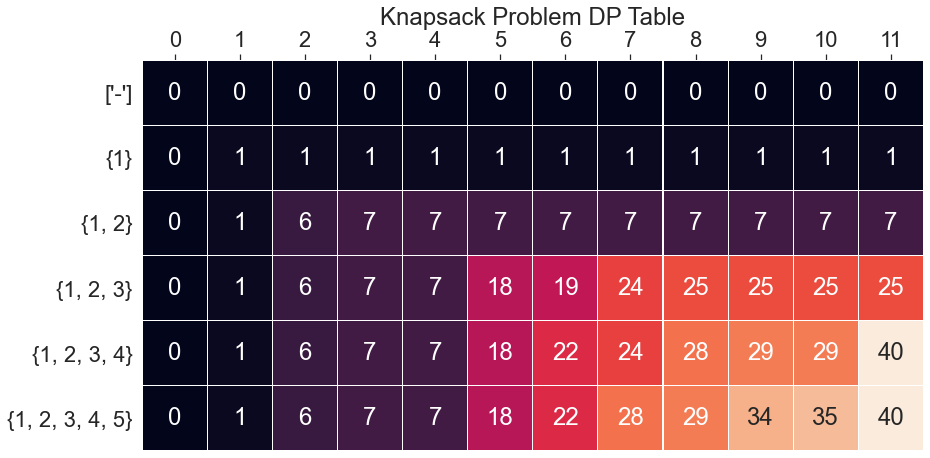

In [119]:
df = pd.DataFrame(dp)
df.index = [['-']] + ["{" + ", ".join(map(str, range(1, i))) + "}" for i in range(2, len(v)+2)]

fig, ax = plt.subplots(figsize=(14, 14))
g = sns.heatmap(df, annot=True, linewidths=.2, ax=ax, square=True, cbar=False)
ax.xaxis.set_ticks_position('top')
sns.set(font_scale=2)
plt.title('Knapsack Problem DP Table')

`dp[i][j]` = Max value in backpack given weight capacity `j` and itemset `items[:i]`

$$\text{Recurrence: localmax = }max \left( \text{localmax, values}[j] + dp[i - \text{weights}[j]] \right) $$

## Weighted Interval scheduling

Given a list of jobs, each having start time, end time and value, find the maximum value subset of mutually compatible jobs.

    jobs = [(0, 6, 1), (1, 4, 10), (3, 5, 5), (3, 8, 8), (4, 7, 15), (5, 9, 12), (6, 10, 17), (8, 11, 4)]

In [82]:
import bisect

def compute_previous_intervals(jobs: List[Tuple]):
    '''
    For every interval j, compute the rightmost mutually compatible interval i, where i < j
    
    input:
        jobs: list of jobs sorted by earliest finish time
    '''
    start = [job[0] for job in jobs]
    finish = [job[1] for job in jobs]

    p = []
    for j in range(len(jobs)):
        i = bisect.bisect_right(finish, start[j]) - 1 # rightmost interval f_i <= s_j
        p.append(i)

    return p

def compute_solution(jobs, OPT, p, ret, j):
    if j >= 0:  # will halt on OPT[-1]
        if jobs[j][-1] + OPT[p[j]] > OPT[j - 1]:
            ret += jobs[j],
            compute_solution(jobs, OPT, p, ret, p[j])
        else:
            compute_solution(jobs, OPT, p, ret, j - 1)
    return ret

def findMaxSubsetJobs(jobs):
    jobs.sort(key=lambda x: x[1])
    p = compute_previous_intervals(jobs)
    
    # compute OPTs iteratively in O(n), here we use DP
    OPT = defaultdict(int)
    OPT[-1] = 0
    OPT[0] = 0
    for j in range(1, len(jobs)):
        OPT[j] = max(jobs[j][-1] + OPT[p[j]], OPT[j - 1])
        
    # given OPT and p, find actual solution intervals in O(n)
    ret = []
    ret = compute_solution(jobs, OPT, p, ret, len(jobs) - 1)

    return sorted(ret, key=lambda x: x[1])

In [83]:
jobs = [(0, 6, 1), (1, 4, 10), (3, 5, 5), (3, 8, 8), (4, 7, 15), (5, 9, 12), (6, 10, 17), (8, 11, 4)]
findMaxSubsetJobs(jobs)

[(1, 4, 10), (3, 5, 5), (0, 6, 1), (4, 7, 15), (3, 8, 8), (5, 9, 12), (6, 10, 17), (8, 11, 4)]
[-1, -1, -1, 0, -1, 1, 2, 4]


[(3, 5, 5), (6, 10, 17)]

$$\text{Recurrence:} OPT[j] = max \left(values[j] + OPT[p[j]], OPT[j-1]\right) $$

## Longest Increasing Subsequence (LIS)

[Longest Increasing Subsequence - LeetCode](https://leetcode.com/problems/longest-increasing-subsequence/)

Given an unsorted array of integers, find the length of longest increasing subsequence.

    Example:

    Input: [10,9,2,5,3,7,101,18]
    Output: 4 
    Explanation: The longest increasing subsequence is [2,3,7,101], therefore the length is 4. 

Note:

- There may be more than one LIS combination, it is only necessary for you to return the length.
- Your algorithm should run in $O(n^2)$ complexity.
- Follow up: Could you improve it to $O(n \log n)$ time complexity?

In [39]:
class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        if not nums:
            return 0

        dp = [1] * len(nums)

        for i in range (1, len(nums)):
            for j in range(i):

                if nums[i] > nums[j]:
                    dp[i] = max(dp[i], dp[j]+1)

        return dp
    

nums = [10,9,2,5,3,7,101,18]
dp = Solution().lengthOfLIS(nums)
assert max(dp) == 4

df = pd.DataFrame({'nums': nums, 'LIS': dp})
print('DP Table')
df.transpose()

DP Table


,0,1,2,3,4,5,6,7
nums,10,9,2,5,3,7,101,18
LIS,1,1,1,2,2,3,4,4


## Longest Common Subsequence (LCS)

[Longest Common Subsequence - LeetCode](https://leetcode.com/problems/longest-common-subsequence/)

Given two strings text1 and text2, return the length of their longest common subsequence.

A subsequence of a string is a new string generated from the original string with some characters(can be none) deleted without changing the relative order of the remaining characters. (eg, "ace" is a subsequence of "abcde" while "aec" is not). A common subsequence of two strings is a subsequence that is common to both strings. If there is no common subsequence, return 0.

    Example 1:
    Input: text1 = "abcde", text2 = "ace" 
    Output: 3  
    Explanation: The longest common subsequence is "ace" and its length is 3.
    
    Example 2:
    Input: text1 = "abc", text2 = "abc"
    Output: 3
    Explanation: The longest common subsequence is "abc" and its length is 3.
    
    Example 3:
    Input: text1 = "abc", text2 = "def"
    Output: 0
    Explanation: There is no such common subsequence, so the result is 0. 

Constraints:

- `1 <= text1.length <= 1000`
- `1 <= text2.length <= 1000`
- The input strings consist of lowercase English characters only.

In [47]:
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str):
        dp = [[0] * (len(text2) + 1) for _ in range(len(text1) + 1)]
        
        for i in range(len(text1)):
            for j in range(len(text2)):
                if text1[i] == text2[j]:
                    dp[i + 1][j + 1] = 1 + dp[i][j]
                else:
                    dp[i + 1][j + 1] = max(dp[i][j + 1], dp[i + 1][j])
        return dp
    

text1 = "hydromagnetics"
text2 = "hydropneumatic" 
dp = Solution().longestCommonSubsequence(text1, text2)
assert dp[-1][-1] == 10

Text(0.5, 1.0, 'LCS DP Table')

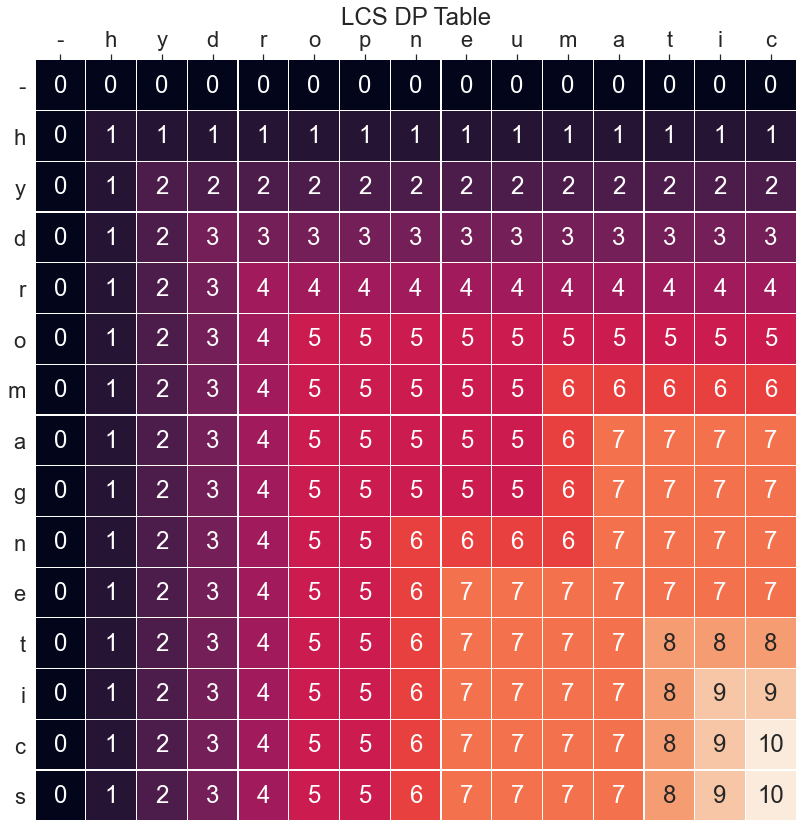

In [49]:
df = pd.DataFrame(dp, index=list('-' + text1), columns=list('-' + text2))

fig, ax = plt.subplots(figsize=(14, 14))
g = sns.heatmap(df, annot=True, linewidths=.2, ax=ax, square=True, cbar=False)
ax.xaxis.set_ticks_position('top')
sns.set(font_scale=2)
plt.yticks(rotation=0)
plt.title('LCS DP Table')

# Network Flows

aka Weighted graph

A weighted graph is interesting because it has little to do with whether the graph is directed, undirected, or contains cycles. At its core, a weighted graph is a graph whose edges have some sort of value that is associated with them. The value that is attached to an edge is what gives the edge its “weight”.

A common way to refer to the “weight” of a single edge is by thinking of it as the cost or distance between two nodes. In other words, to go from node a to node b has some sort of cost to it.
Or, if we think of the nodes like locations on a map, then the weight could instead be the distance between nodes $a$ and $b$. Continuing with the map metaphor, the “weight” of an edge can also represent the capacity of what can be transported, or what can be moved between two nodes, $a$ and $b$.

## Representation

Adjacency Matrix

- one difference from unweighted graphs: instead of being binary, $A_{ij}$ indicate weighted edge from `i -> j` with weight $A_{ij}$


    [0, 5, 14, 0, 0, 0, 0, 0, 0]
    [0, 0, 4, 0, 3, 0, 0, 0, 0]
    [0, 0, 0, 0, 0, 7, 0, 0, 0]
    [0, 0, 0, 0, 0, 0, 6, 6, 0]
    [0, 0, 0, 8, 0, 0, 0, 4, 0]
    [0, 6, 0, 0, 3, 0, 0, 6, 0]
    [0, 0, 0, 0, 0, 0, 0, 0, 10]
    [0, 0, 0, 0, 0, 0, 0, 0, 8]
    [0, 0, 0, 0, 0, 0, 0, 0, 0]

## Shortest Paths

|                  | Dijkstra                                                                       | Bellman-Ford                                                                                                                                                                                                                                                                                                                                            |
|------------------|--------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Description      | Can end up in infinite loop if negative weighted edges exist.                  | Bellman Ford algorithm works by overestimating the length of the path<br>from the starting vertex to all other vertices. Then it iteratively<br>relaxes those estimates by finding new paths that are shorter than<br>the previously overestimated paths. By doing this repeatedly for <br>all vertices, we can guarantee that the result is optimized.<br>Guaranteed to terminate. |
| Approach         | Greedy                                                                         | Dynamic Programming                                                                                                                                                                                                                                                                                                                                     |
| Difference       |                                                                                | Works with negative weighted edges (can detect negative cycles)                                                                                                                                                                                                                                                                                         |
| Time Complexity  | $O(|V|+|E| \log |V|)$<br>where, E is the number of edges and V is the number of vertices. | $O(|E||V|)$                                                                                                                                                                                                                                                                                                                                                   |
| Space Complexity | $O(V)$                                                                           | $O(V)$                                                                                                                                                                                                                                                                                                                                                    |
| Link             | - https://www.programiz.com/dsa/dijkstra-algorithm<br> - https://www.youtube.com/watch?v=_lHSawdgXpI                               | - https://www.programiz.com/dsa/bellman-ford-algorithm<br> - https://www.youtube.com/watch?v=obWXjtg0L64                                                                                                                                                                                                                                                                                                    |

However, Dijkstra's algorithm greedily selects the minimum-weight node that has not yet been processed, and performs this relaxation process on all of its outgoing edges; in contrast, the Bellman–Ford algorithm simply relaxes all the edges, and does this |V | − 1 times, where |V | is the number of vertices in the graph. In each of these repetitions, the number of vertices with correctly calculated distances grows, from which it follows that eventually all vertices will have their correct distances. This method allows the Bellman–Ford algorithm to be applied to a wider class of inputs than Dijkstra.

Dijkstra is however generally considered better in the absence of negative weight edges, as a typical binary heap priority queue implementation has O((|E|+|V|)log|V|) time complexity [A Fibonacci heap priority queue gives O(|V|log|V| + |E|)], while the Bellman-Ford algorithm has O(|V||E|) complexity

* Shortest paths differs from minimum spanning tree because the shortest distance between two vertices might not include all the vertices of the graph.

### Dijkstra's Algorithm

Dijkstra’s algorithm can be used to determine the shortest path from one node in a graph to every other node within the same graph data structure, provided that the nodes are reachable from the starting node.

This algorithm will continue to run until all of the reachable vertices in a graph have been visited, which means that we could run Dijkstra’s algorithm, find the shortest path between any two reachable nodes, and then save the results somewhere. Once we run Dijkstra’s algorithm just once, we can look up our results from our algorithm again and again — without having to actually run the algorithm itself!

- It differs from minimum spanning tree because the shortest distance between two vertices might not include all the vertices of the graph.

How Dijkstra's Algorithm works

Dijkstra's Algorithm works on the basis that any subpath `B -> D` of the shortest path `A -> D` between vertices `A` and `D` is also the shortest path between vertices `B` and `D`.

Djikstra used this property in the opposite direction i.e we overestimate the distance of each vertex from the starting vertex. Then we visit each node and its neighbours to find the shortest subpath to those neighbours.

### Analysis

- The algorithm uses a greedy approach in the sense that we find the next best solution hoping that the end result is the best solution for the whole problem.
- The shortest path between two vertices in a graph $G$ with $n$ vertices and $m$ edges can be computed in $O(m+n log(n))$ time.
- Or using heap-based priority queue implementation $O(m log(n))$.

### Links

- [Dijkstra's Shortest Path Algorithm | Brilliant Math & Science Wiki](https://brilliant.org/wiki/dijkstras-short-path-finder/)
- [Dijkstra's Algorithm](https://www.programiz.com/dsa/dijkstra-algorithm)
- [Dijkstra's Algorithm - Shortest paths with Dijkstra's Algorithm](https://www.codingame.com/playgrounds/1608/shortest-paths-with-dijkstras-algorithm/dijkstras-algorithm)
- [Finding The Shortest Path, With A Little Help From Dijkstra](https://medium.com/basecs/finding-the-shortest-path-with-a-little-help-from-dijkstra-613149fbdc8e)
- [https://www.youtube.com/watch?v=K_1urzWrzLs](https://www.youtube.com/watch?v=K_1urzWrzLs)

### Related

- [Greedy Algorithm](#Greedy-Algorithms)
- [Graph](#Graph)

In [3]:
# %load algorithms/graph_weighted.py

In [2]:
from algorithms.graph_weighted import WeightedGraph

print("\nWeighted Graph / Dijkstra's Shortest Path")
edges = [
    (0, 2, 9), (0, 6, 14), (0, 7, 15),
    (2, 3, 24), (3, 1, 19), (3, 5, 2),
    (4, 3, 6), (4, 1, 6), (5, 1, 16),
    (5, 4, 11), (6, 5, 30), (6, 7, 5),
    (6, 3, 18), (7, 5, 20), (7, 1, 44)
]
directed = True
graph = WeightedGraph.from_edges(edges, directed)
print('directed:', directed)

print('source -> dest, weight')
for src, dest, weight in sorted(graph.get_edges(), key=lambda x: x[0]):
    print(f'{src} -> {dest}, {weight}')

print('adjacency list')
adj_list = graph.get_adjacency_list()
for i, row in enumerate(adj_list):
    print(f'{i}: {row}')

print('\nadjacency matrix')
for row in graph.adjacency_matrix:
    print(row)

print('\nShortest distance:')
src = 0
dest = 1
print(graph.dijkstra_shortest_path(src, dest))


Weighted Graph / Dijkstra's Shortest Path
directed: True
source -> dest, weight
0 -> 2, 9
0 -> 7, 15
0 -> 6, 14
2 -> 3, 24
3 -> 1, 19
3 -> 5, 2
4 -> 1, 6
4 -> 3, 6
5 -> 1, 16
5 -> 4, 11
6 -> 5, 30
6 -> 3, 18
6 -> 7, 5
7 -> 1, 44
7 -> 5, 20
adjacency list
0: [2, 6, 7]
1: []
2: [3]
3: [1, 5]
4: [1, 3]
5: [1, 4]
6: [3, 5, 7]
7: [1, 5]

adjacency matrix
[0, 0, 9, 0, 0, 0, 14, 15]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 24, 0, 0, 0, 0]
[0, 19, 0, 0, 0, 2, 0, 0]
[0, 6, 0, 6, 0, 0, 0, 0]
[0, 16, 0, 0, 11, 0, 0, 0]
[0, 0, 0, 18, 0, 30, 0, 5]
[0, 44, 0, 0, 0, 20, 0, 0]

Shortest distance:
50


### Bellman-Ford Algorithm

Bellman Ford algorithm helps us find the shortest path from a vertex to all other vertices of a weighted graph.
It is similar to [Dijkstra's algorithm](#Dijkstra's-Algorithm) but it can work with **graphs in which edges can have negative weights.**

Why would one ever have edges with negative weights in real life?
- Negative weight edges might seem useless at first but they can explain a lot of phenomena like cashflow, the heat released/absorbed in a chemical reaction, etc.
- For instance, if there are different ways to reach from one chemical A to another chemical B, each method will have sub-reactions involving both heat dissipation and absorption.
- If we want to find the set of reactions where minimum energy is required, then we will need to be able to factor in the heat absorption as negative weights and heat dissipation as positive weights.

Why do we need to be careful with negative weights?
- Negative weight edges can create negative weight cycles i.e. a cycle that will reduce the total path distance by coming back to the same point.
- Shortest path algorithms like Dijkstra's Algorithm that aren't able to detect such a cycle can give an incorrect result because they can go through a negative weight cycle and reduce the path length.

### Links
- https://www.programiz.com/dsa/bellman-ford-algorithm

### Related

- [Dynamic Programming](#Dynamic-Programming)
- [Graph](#Graph)

In [5]:
dist = graph.bellman_ford(0)
dist

Vertex Distance from Source
0		0
1		50
2		9
3		32
4		45
5		34
6		14
7		15


[0, 50, 9, 32, 45, 34, 14, 15]

## Minimum Spanning Tree (MST)

### Prim's Algorithm

Weighted undirected graph

https://www.youtube.com/watch?v=cplfcGZmX7I

In [2]:
# %load algorithms/prim.py

In [3]:
from algorithms.graph_weighted import WeightedGraph

adjacency_matrix = [
    [0, 9, 75, 0, 0],
    [9, 0, 95, 19, 42],
    [75, 95, 0, 51, 66],
    [0, 19, 51, 0, 31],
    [0, 42, 66, 31, 0]
]
directed = False
graph = WeightedGraph(adjacency_matrix, directed)
print('directed:', directed)

print('source -> dest, weight')
for src, dest, weight in sorted(graph.get_edges(), key=lambda x: x[0]):
    print(f'{src} -> {dest}, {weight}')

print('\nadjacency matrix')
for row in graph.adjacency_matrix:
    print(row)

print("\nPrim's Algorithm")
mst = graph.prim_mst()
for src, dest, weight in mst:
    print(f'{src} -> {dest}, {weight}')

directed: False
source -> dest, weight
0 -> 1, 9
0 -> 2, 75
1 -> 2, 95
1 -> 3, 19
1 -> 0, 9
1 -> 4, 42
2 -> 0, 75
2 -> 4, 66
2 -> 1, 95
2 -> 3, 51
3 -> 1, 19
3 -> 2, 51
3 -> 4, 31
4 -> 3, 31
4 -> 2, 66
4 -> 1, 42

adjacency matrix
[0, 9, 75, 0, 0]
[9, 0, 95, 19, 42]
[75, 95, 0, 51, 66]
[0, 19, 51, 0, 31]
[0, 42, 66, 31, 0]

Prim's Algorithm
0 -> 1, 9
1 -> 3, 19
3 -> 4, 31
3 -> 2, 51


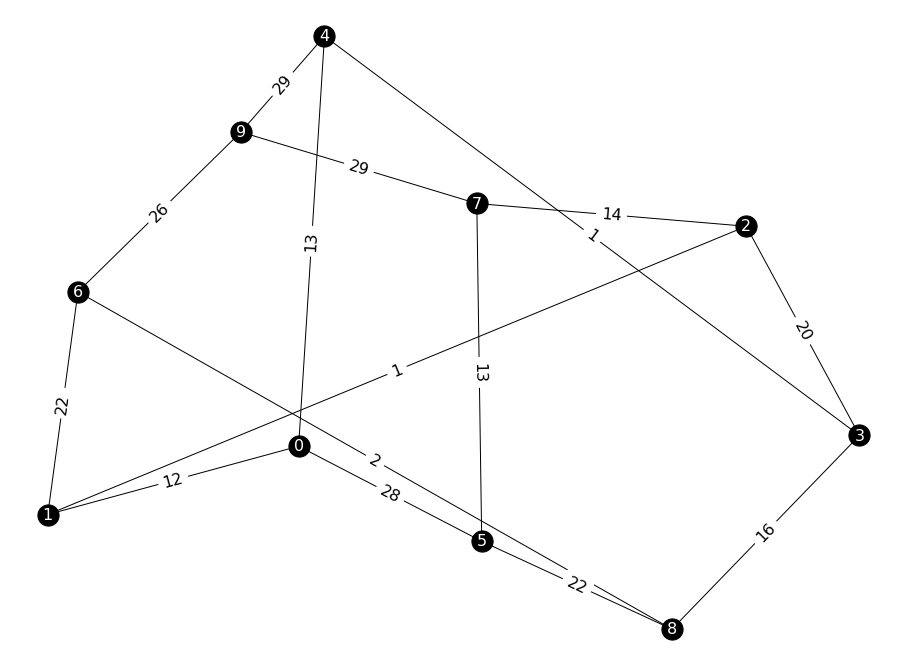

In [11]:
graph = WeightedGraph.generate_graph()
graph.plot()

In [12]:
print('directed:', directed)

print('source -> dest, weight')
for src, dest, weight in sorted(graph.get_edges(), key=lambda x: x[0]):
    print(f'{src} -> {dest}, {weight}')

print('\nadjacency matrix')
for row in graph.adjacency_matrix:
    print(row)

print("\nPrim's Algorithm")
mst = graph.prim_mst()
for src, dest, weight in mst:
    print(f'{src} -> {dest}, {weight}')

directed: False
source -> dest, weight
0 -> 5, 28
0 -> 4, 13
0 -> 1, 12
1 -> 6, 22
1 -> 2, 1
1 -> 0, 12
2 -> 3, 20
2 -> 1, 1
2 -> 7, 14
3 -> 4, 1
3 -> 8, 16
3 -> 2, 20
4 -> 3, 1
4 -> 9, 29
4 -> 0, 13
5 -> 0, 28
5 -> 7, 13
5 -> 8, 22
6 -> 9, 26
6 -> 1, 22
6 -> 8, 2
7 -> 5, 13
7 -> 2, 14
7 -> 9, 29
8 -> 6, 2
8 -> 3, 16
8 -> 5, 22
9 -> 6, 26
9 -> 4, 29
9 -> 7, 29

adjacency matrix
[0, 12, 0, 0, 13, 28, 0, 0, 0, 0]
[12, 0, 1, 0, 0, 0, 22, 0, 0, 0]
[0, 1, 0, 20, 0, 0, 0, 14, 0, 0]
[0, 0, 20, 0, 1, 0, 0, 0, 16, 0]
[13, 0, 0, 1, 0, 0, 0, 0, 0, 29]
[28, 0, 0, 0, 0, 0, 0, 13, 22, 0]
[0, 22, 0, 0, 0, 0, 0, 0, 2, 26]
[0, 0, 14, 0, 0, 13, 0, 0, 0, 29]
[0, 0, 0, 16, 0, 22, 2, 0, 0, 0]
[0, 0, 0, 0, 29, 0, 26, 29, 0, 0]

Prim's Algorithm
0 -> 1, 12
1 -> 2, 1
0 -> 4, 13
4 -> 3, 1
2 -> 7, 14
7 -> 5, 13
3 -> 8, 16
8 -> 6, 2
6 -> 9, 26


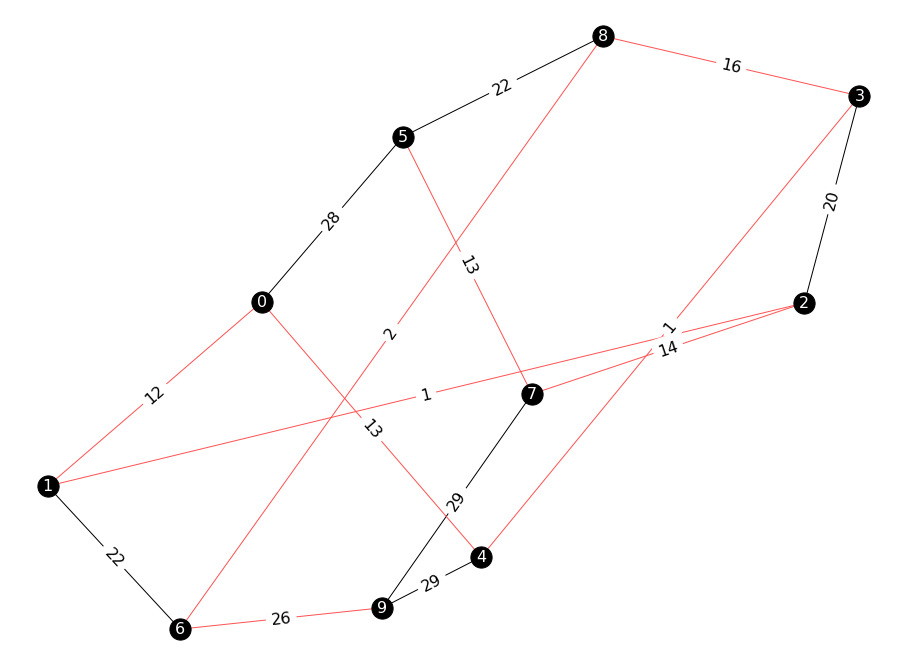

In [13]:
graph.plot(path_to_color=mst)

## Max Flow - Ford-Fulkerson Algorithm

- Ford Fulkerson == Edmond's Karp

https://www.youtube.com/watch?v=Tl90tNtKvxs

In [25]:
# %load algorithms/ford_fulkerson.py

In [26]:
from algorithms.ford_fulkerson import WeightedGraph

adjacency_matrix = [
    [0, 5, 14, 0, 0, 0, 0, 0, 0], # s
    [0, 0, 4, 0, 3, 0, 0, 0, 0], # a
    [0, 0, 0, 0, 0, 7, 0, 0, 0], # b
    [0, 0, 0, 0, 0, 0, 6, 6, 0], # c
    [0, 0, 0, 8, 0, 0, 0, 4, 0], # d
    [0, 6, 0, 0, 3, 0, 0, 6, 0], # e
    [0, 0, 0, 0, 0, 0, 0, 0, 10], # f
    [0, 0, 0, 0, 0, 0, 0, 0, 8], # g
    [0, 0, 0, 0, 0, 0, 0, 0, 0] # t
]

graph = WeightedGraph(adjacency_matrix)


print('source -> dest, weight')
for src, dest, weight in sorted(graph.get_edges(), key=lambda x: x[0]):
    print(f'{src} -> {dest}, {weight}')

print('\nadjacency matrix')
for row in graph.adjacency_matrix:
    print(row)

source = 0 # s
sink = 8 # t
maxflow = graph.ford_fulkerson(source, sink)
print("\nMax Flow:", str(maxflow))

print('\nresidual graph')
for row in graph.adjacency_matrix:
    print(row)

source -> dest, weight
0 -> 2, 14
0 -> 1, 5
1 -> 2, 4
1 -> 4, 3
2 -> 5, 7
3 -> 7, 6
3 -> 6, 6
4 -> 3, 8
4 -> 7, 4
5 -> 7, 6
5 -> 1, 6
5 -> 4, 3
6 -> 8, 10
7 -> 8, 8

adjacency matrix
[0, 5, 14, 0, 0, 0, 0, 0, 0]
[0, 0, 4, 0, 3, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 7, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 6, 6, 0]
[0, 0, 0, 8, 0, 0, 0, 4, 0]
[0, 6, 0, 0, 3, 0, 0, 6, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 10]
[0, 0, 0, 0, 0, 0, 0, 0, 8]
[0, 0, 0, 0, 0, 0, 0, 0, 0]

Max Flow: 10

residual graph
[0, 2, 7, 0, 0, 0, 0, 0, 0]
[3, 0, 4, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 2, 0, 4, 6, 0]
[0, 3, 0, 6, 0, 2, 0, 1, 0]
[0, 6, 7, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 2, 0, 0, 0, 0, 8]
[0, 0, 0, 0, 3, 5, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 2, 8, 0]
